# Business problem we are trying to solve

How can we predict whether an online shopper will make a purchase based on their browsing behavior and other attributes?

# import the necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

# Get the data

## import csv file

In [3]:
data = pd.read_csv('..\\Datasets\\online_shoppers_intention.csv')

# Explore the Data

In [ ]:
# Display the first five observations
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [32]:
data['Month'].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

In [26]:
# Replace True with 'Buy' and False with 'No-Buy' in the 'Revenue' column
data['Revenue'] = data['Revenue'].replace({True: 'Buy', False: 'No-Buy'})

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [28]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Univariate analysis (EDA)

## numerical Analysis

In [29]:
# Function used to explore each feature
def univariate_analysis(data):
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

    for column in numeric_columns:
        print(f'\nAnalysis for {column}:\n')
        print(data[column].describe())
        
        plt.figure(figsize=(12, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data[column], kde=True, bins=30)
        plt.title(f'Histogram of {column}')
        
        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=data[column])
        plt.title(f'Box Plot of {column}')
        
        plt.tight_layout()
        plt.show()


Analysis for Administrative:

count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64


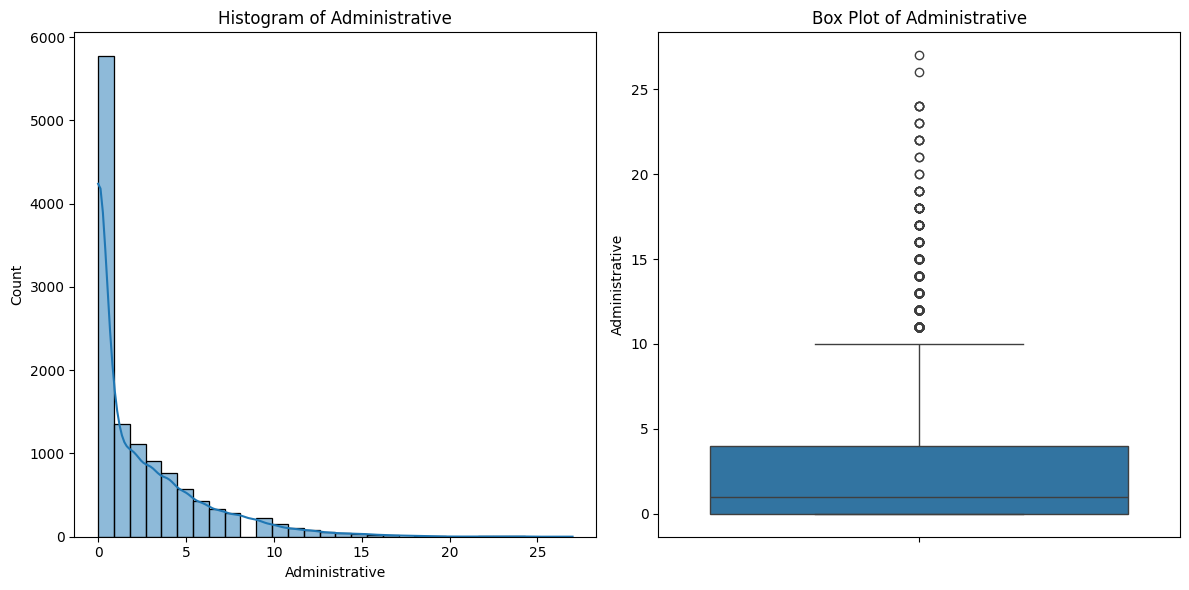


Analysis for Administrative_Duration:

count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: Administrative_Duration, dtype: float64


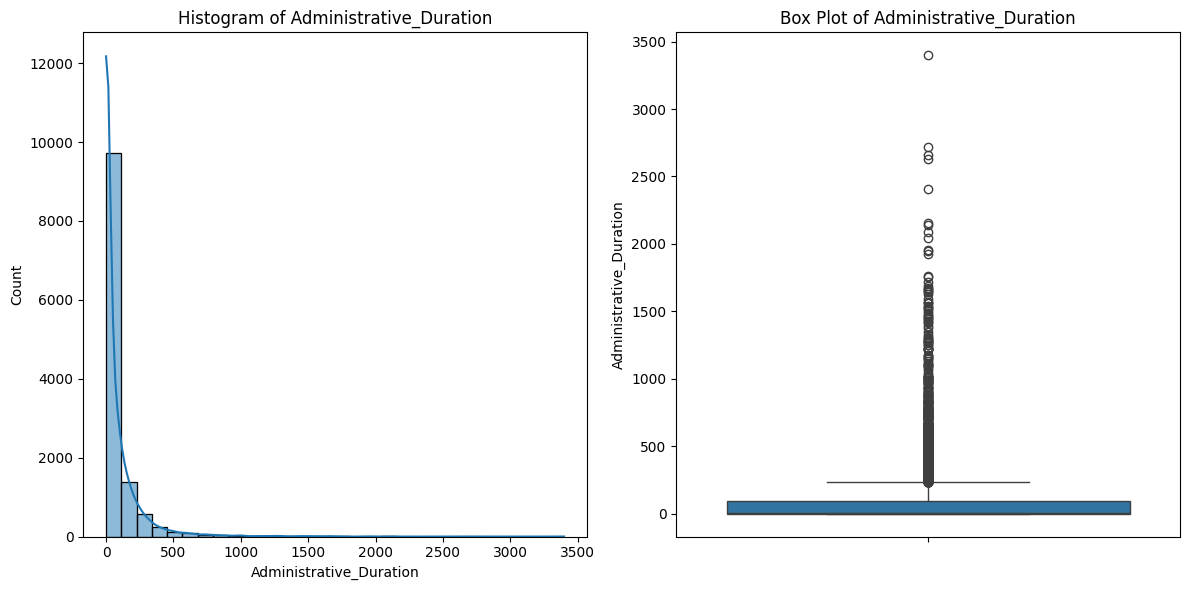


Analysis for Informational:

count    12330.000000
mean         0.503569
std          1.270156
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64


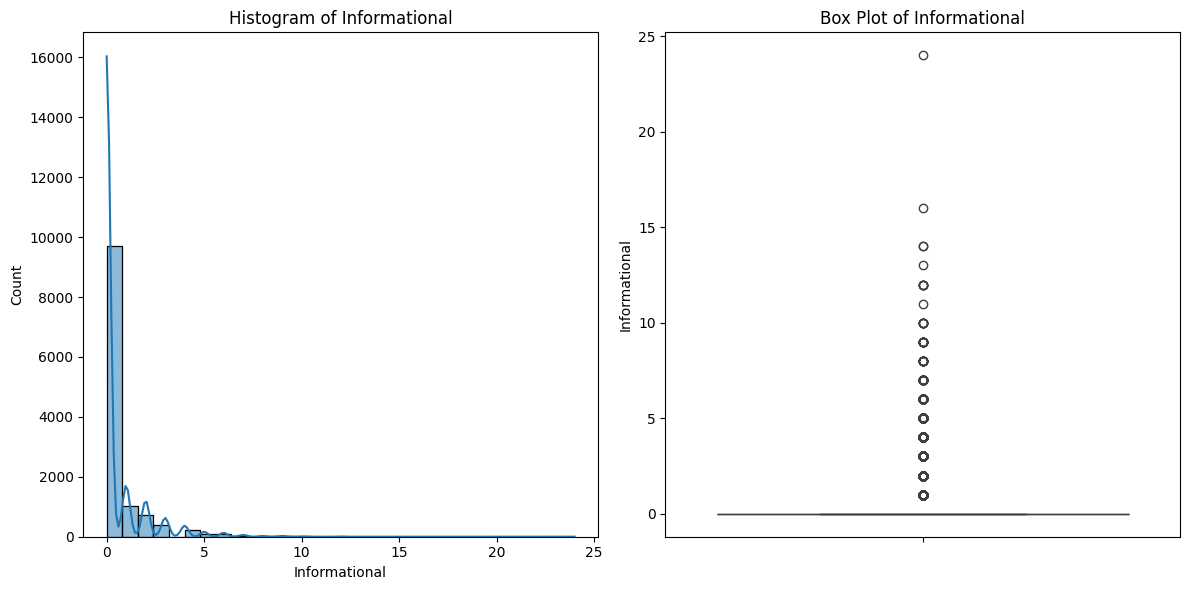


Analysis for Informational_Duration:

count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64


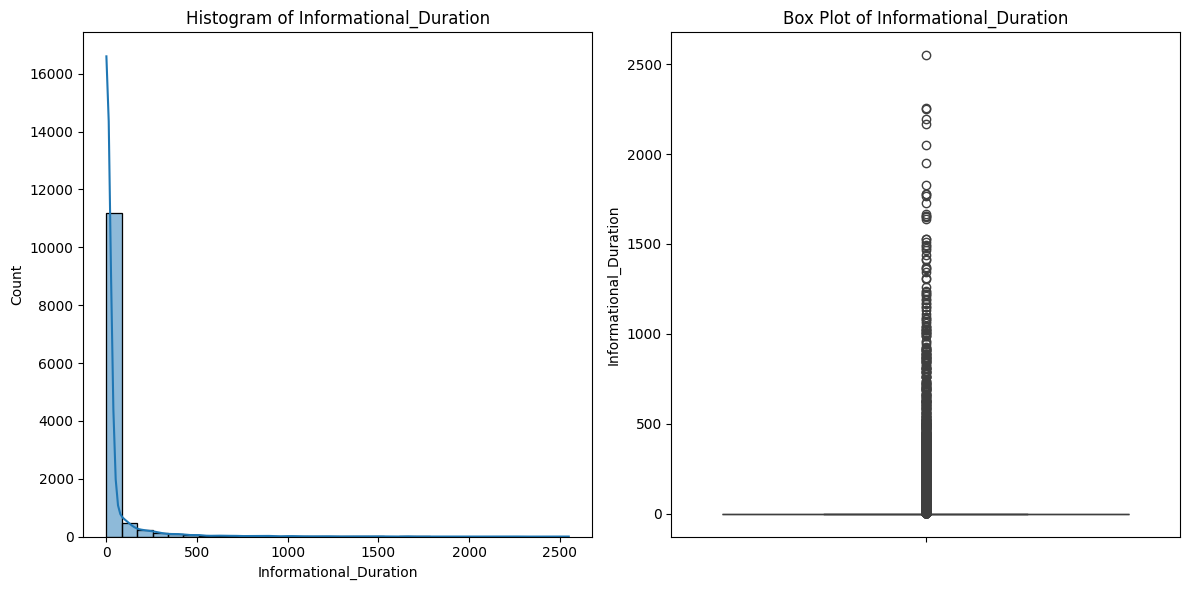


Analysis for ProductRelated:

count    12330.000000
mean        31.731468
std         44.475503
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64


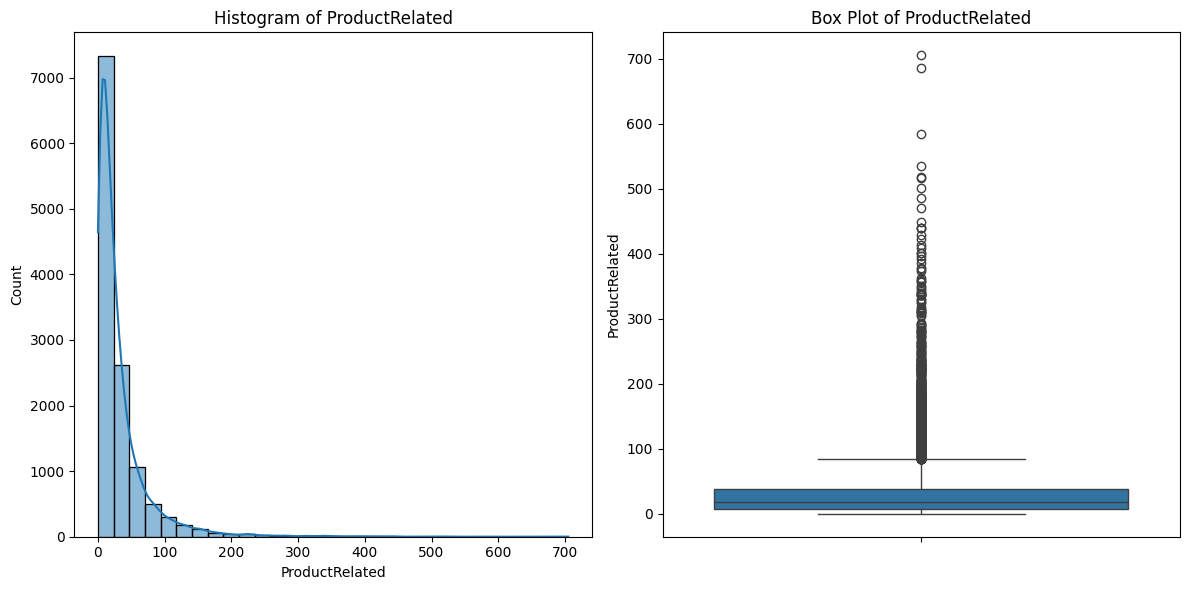


Analysis for ProductRelated_Duration:

count    12330.000000
mean      1194.746220
std       1913.669288
min          0.000000
25%        184.137500
50%        598.936905
75%       1464.157214
max      63973.522230
Name: ProductRelated_Duration, dtype: float64


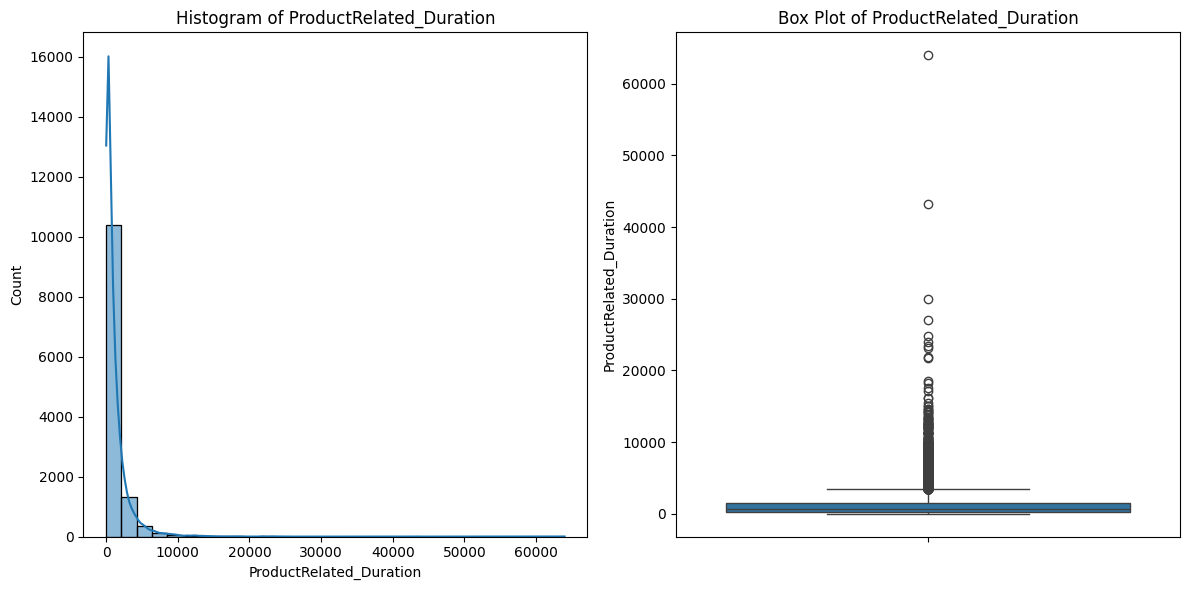


Analysis for BounceRates:

count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates, dtype: float64


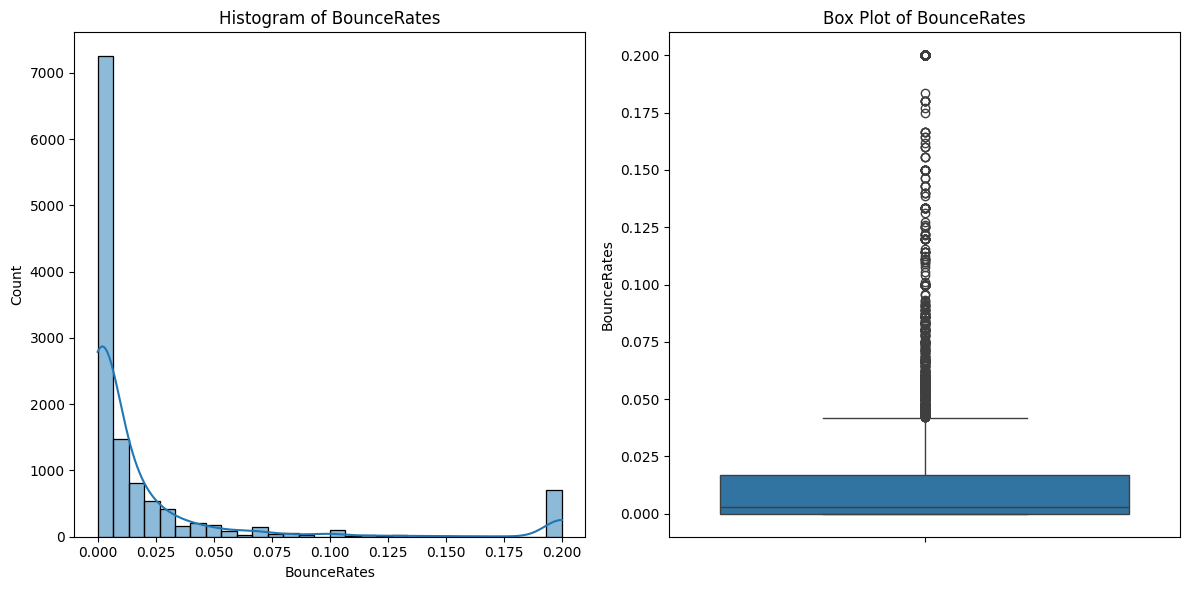


Analysis for ExitRates:

count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64


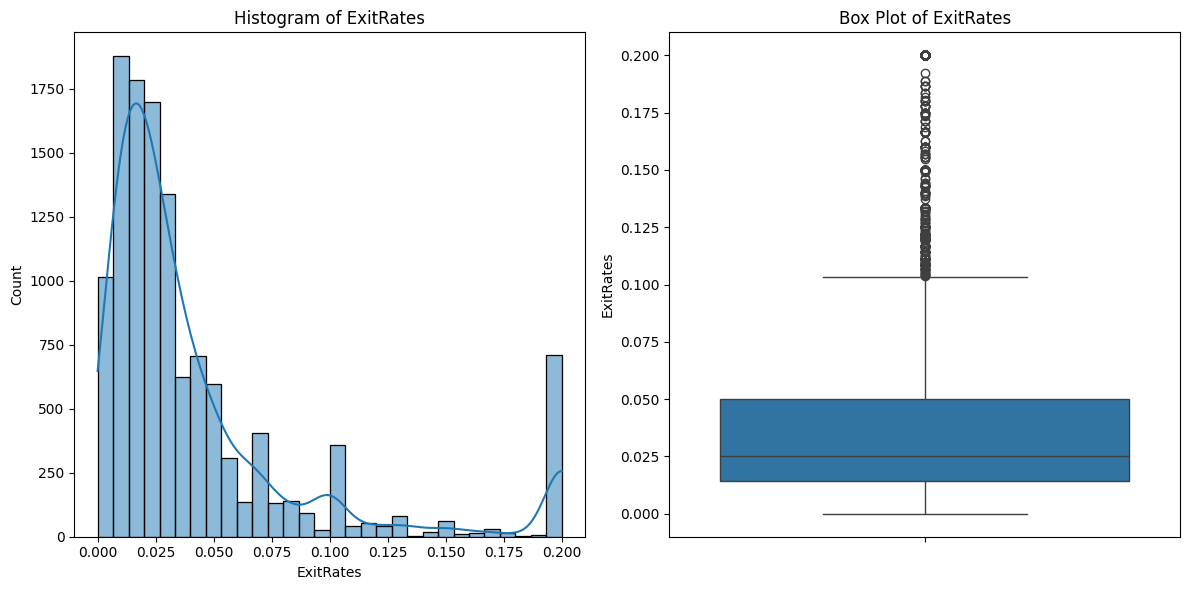


Analysis for PageValues:

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64


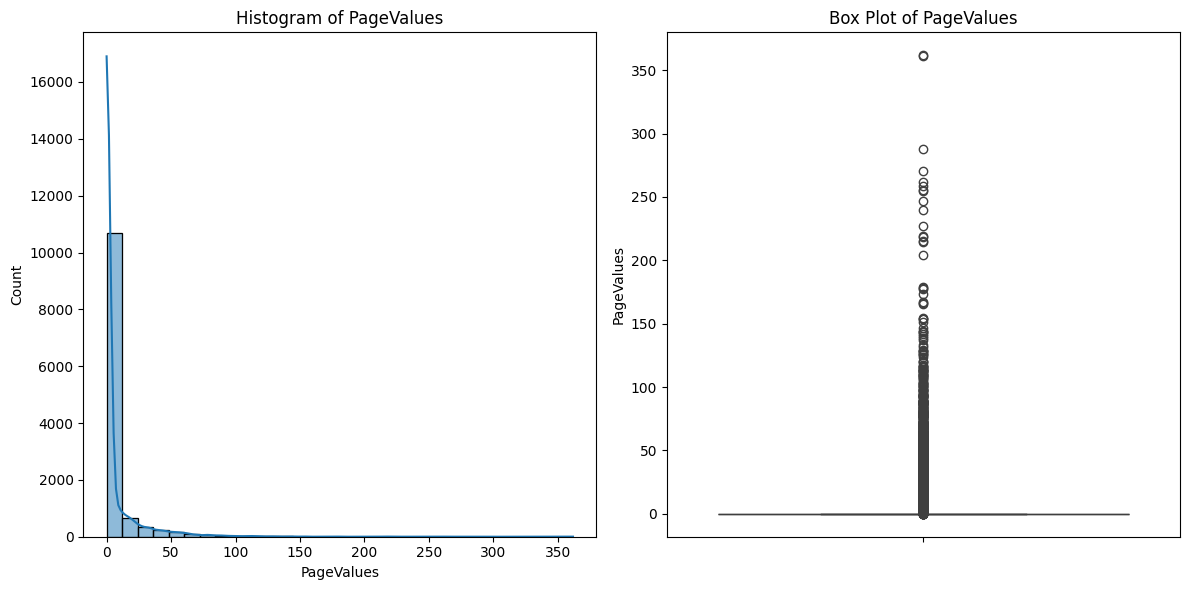


Analysis for SpecialDay:

count    12330.000000
mean         0.061427
std          0.198917
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64


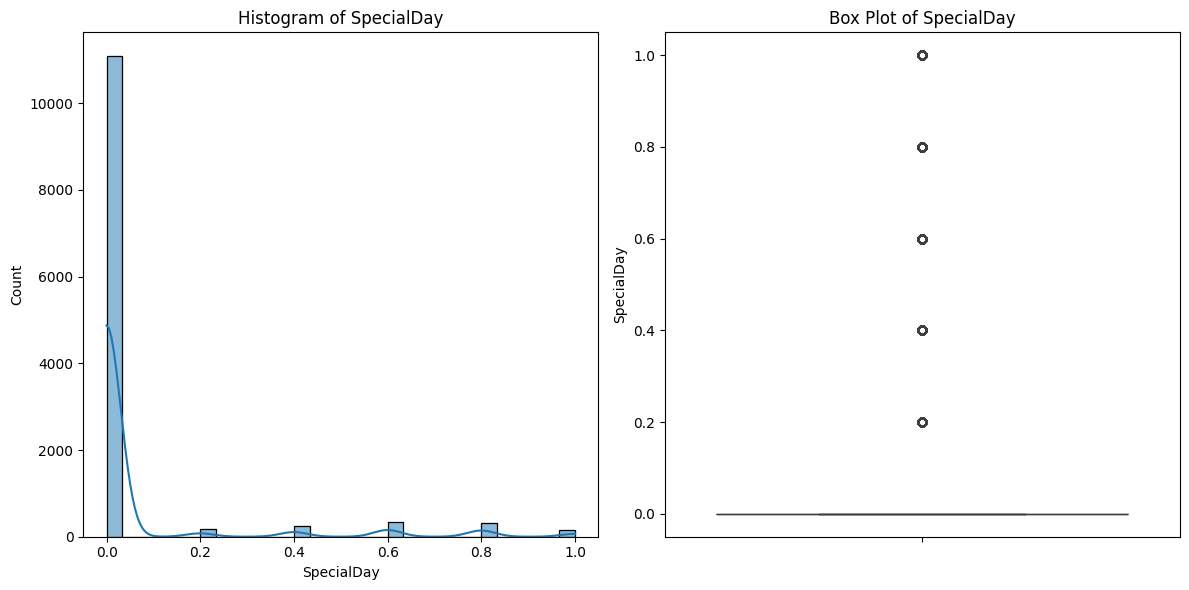


Analysis for OperatingSystems:

count    12330.000000
mean         2.124006
std          0.911325
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: OperatingSystems, dtype: float64


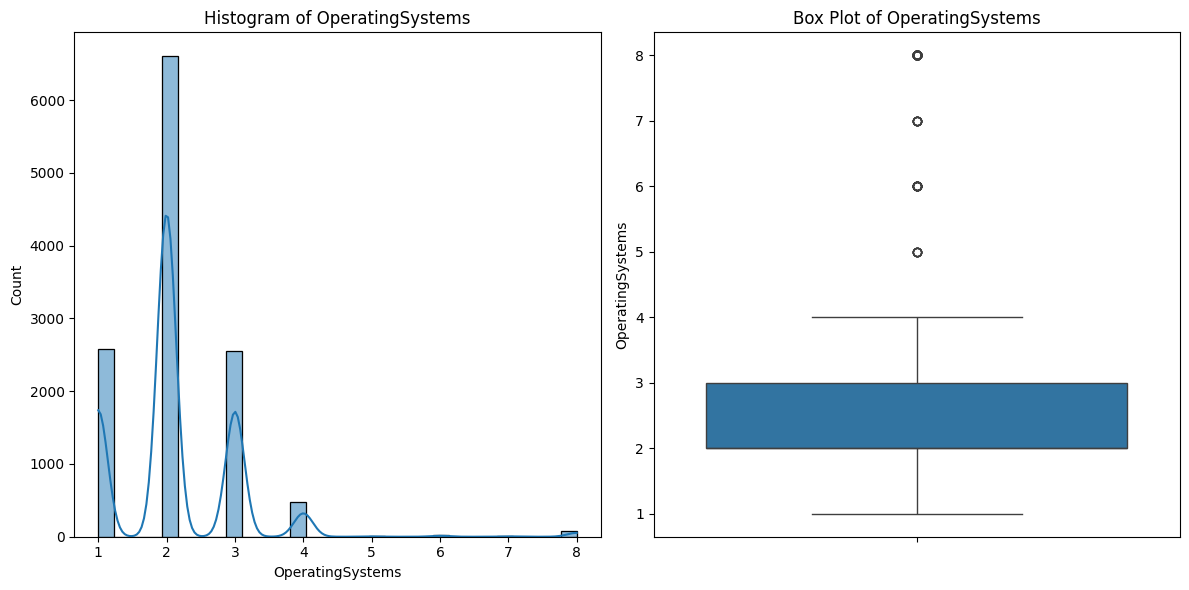


Analysis for Browser:

count    12330.000000
mean         2.357097
std          1.717277
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         13.000000
Name: Browser, dtype: float64


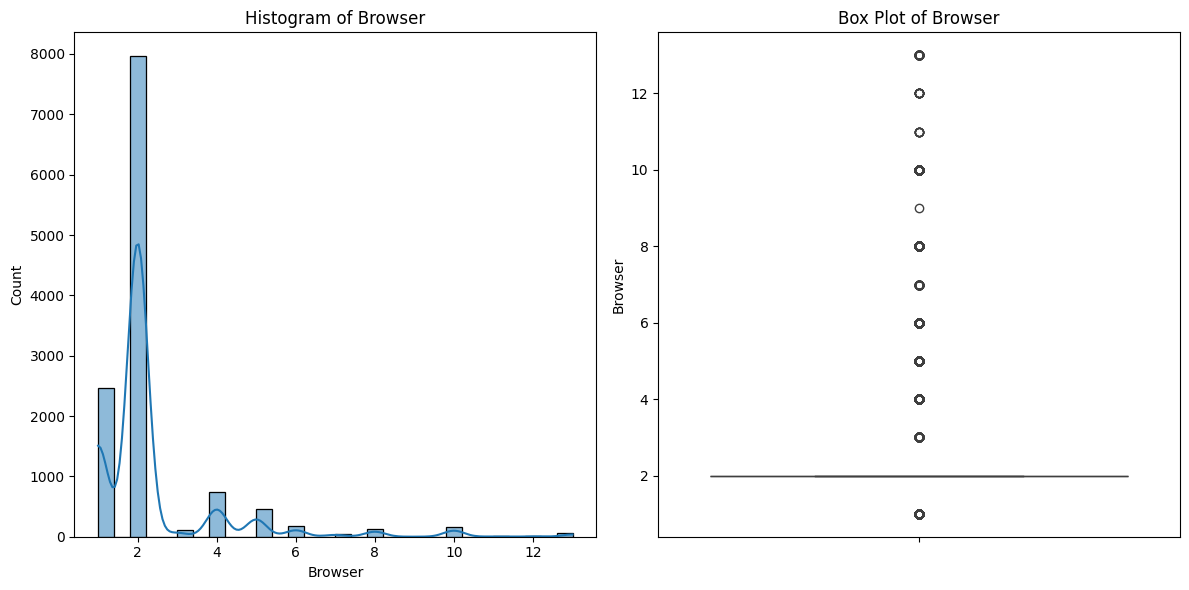


Analysis for Region:

count    12330.000000
mean         3.147364
std          2.401591
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: Region, dtype: float64


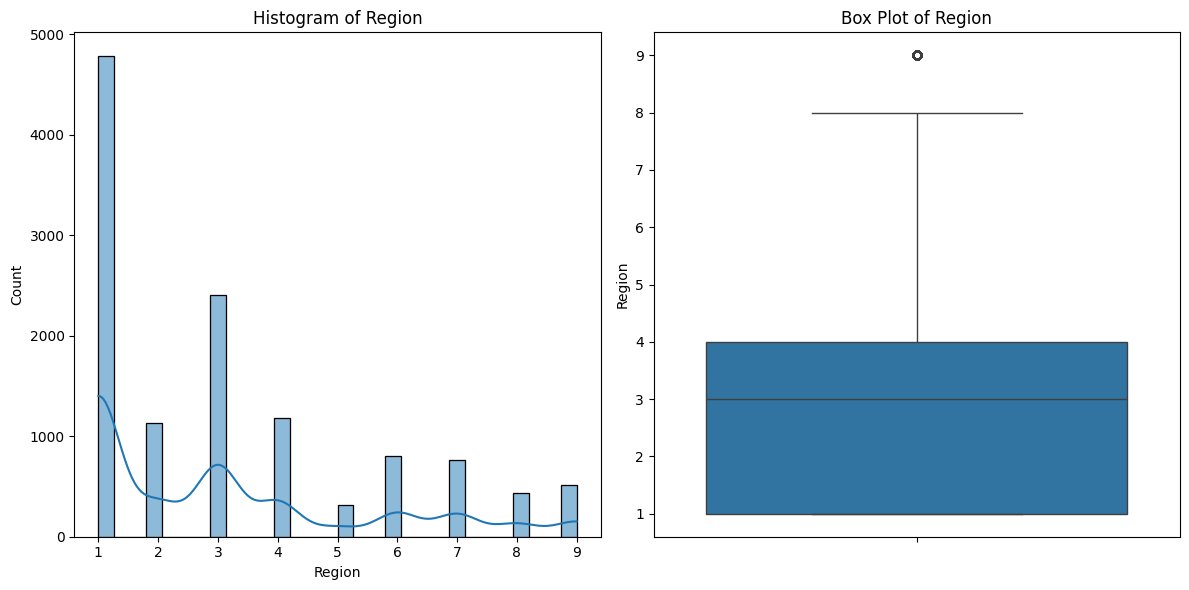


Analysis for TrafficType:

count    12330.000000
mean         4.069586
std          4.025169
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         20.000000
Name: TrafficType, dtype: float64


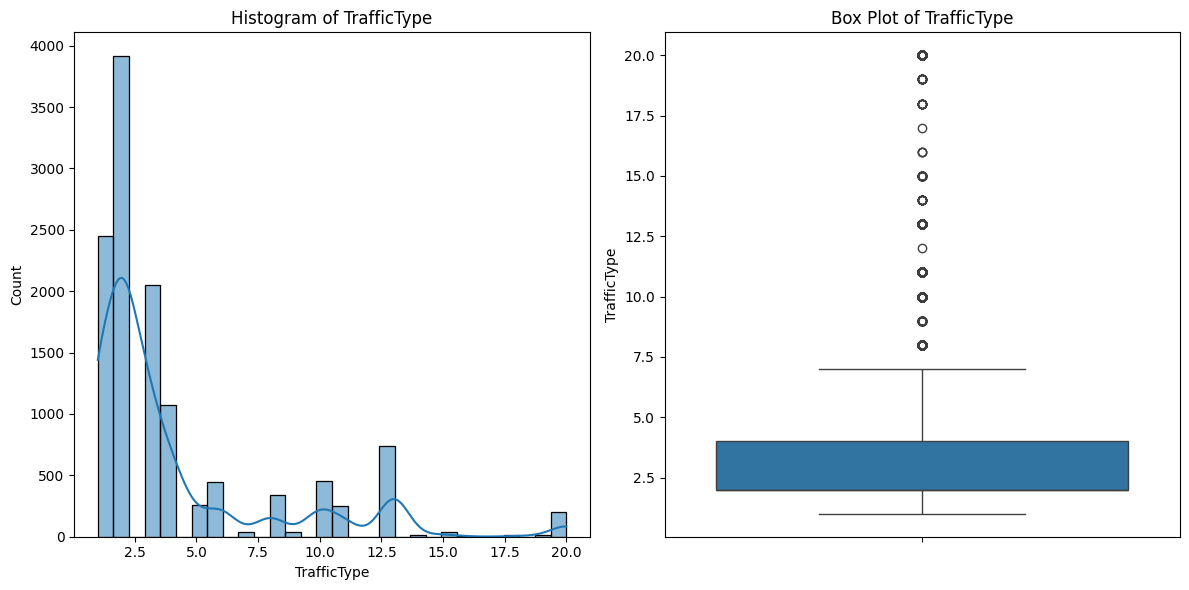

In [30]:
# Perform univariate analysis
univariate_analysis(data)

### Observation

**Outliers**: Many columns exhibit significant outliers, which may impact the analysis. These outliers will be handle in data preparation stage.

**Skewness**: Several columns are heavily right-skewed, suggesting the need for possible transformations to normalize the data.

## Categorical Analysis

In [33]:
# Function used to explore categorical features
def categorical_analysis(data):
    categorical_columns = data.select_dtypes(include=['object']).columns

    for column in categorical_columns:
        print(f'\nAnalysis for {column}:\n')
        value_counts = data[column].value_counts()
        print(value_counts)

        plt.figure(figsize=(12, 6))

        # Bar Graph
        plt.subplot(1, 2, 1)
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Bar Graph of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        # Pie Chart
        plt.subplot(1, 2, 2)
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(value_counts)))
        plt.title(f'Pie Chart of {column}')

        plt.tight_layout()
        plt.show()


Analysis for Month:

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_3696\2998391246.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


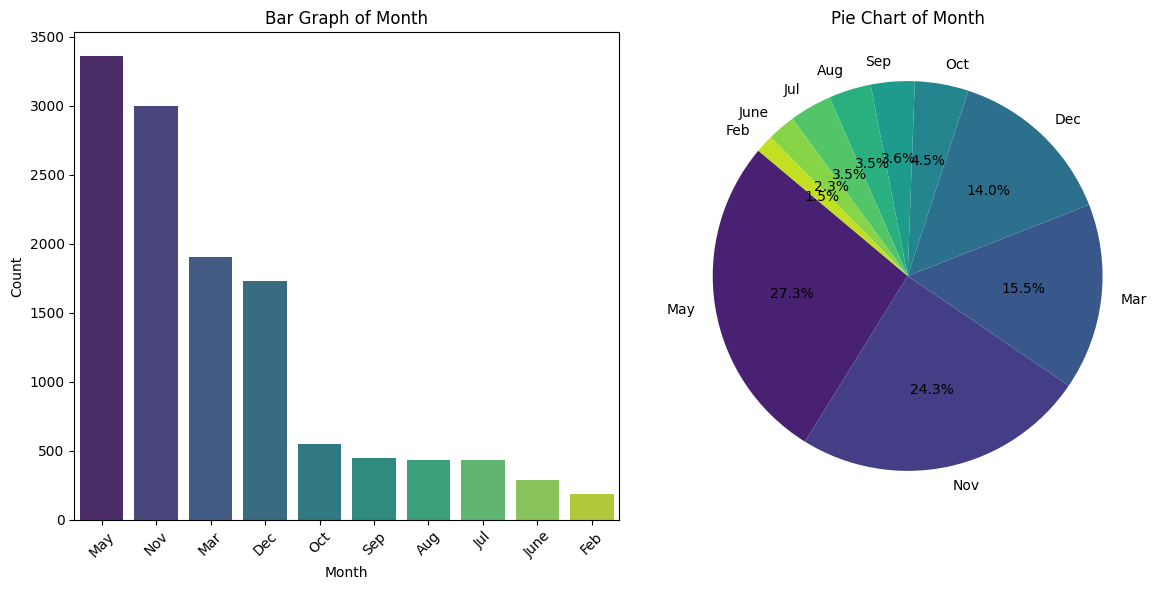


Analysis for VisitorType:

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_3696\2998391246.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


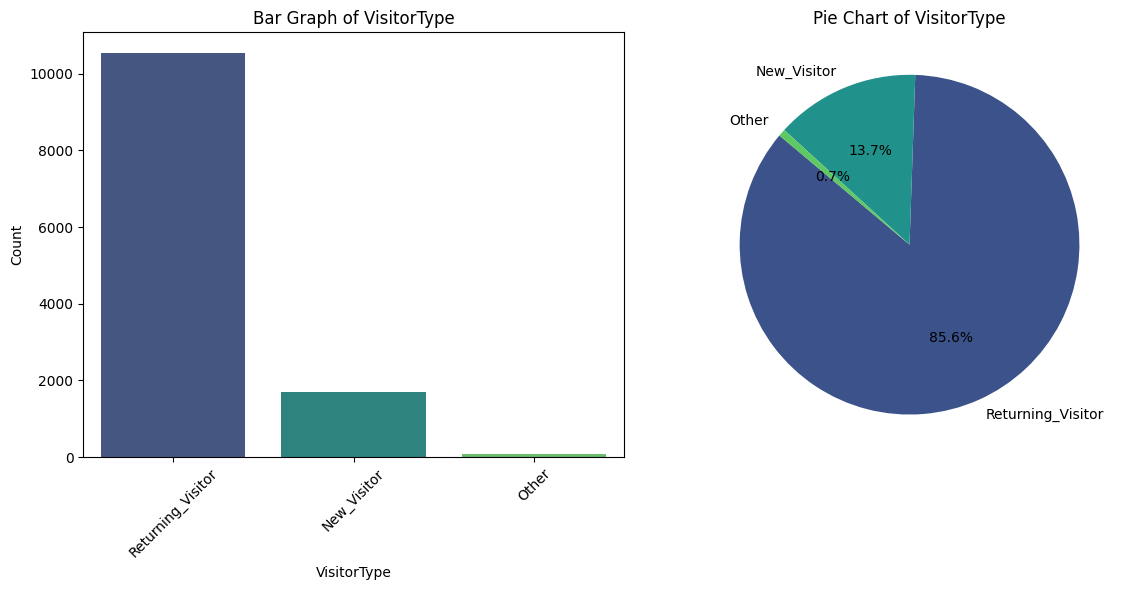


Analysis for Revenue:

Revenue
No-Buy    10422
Buy        1908
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_3696\2998391246.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


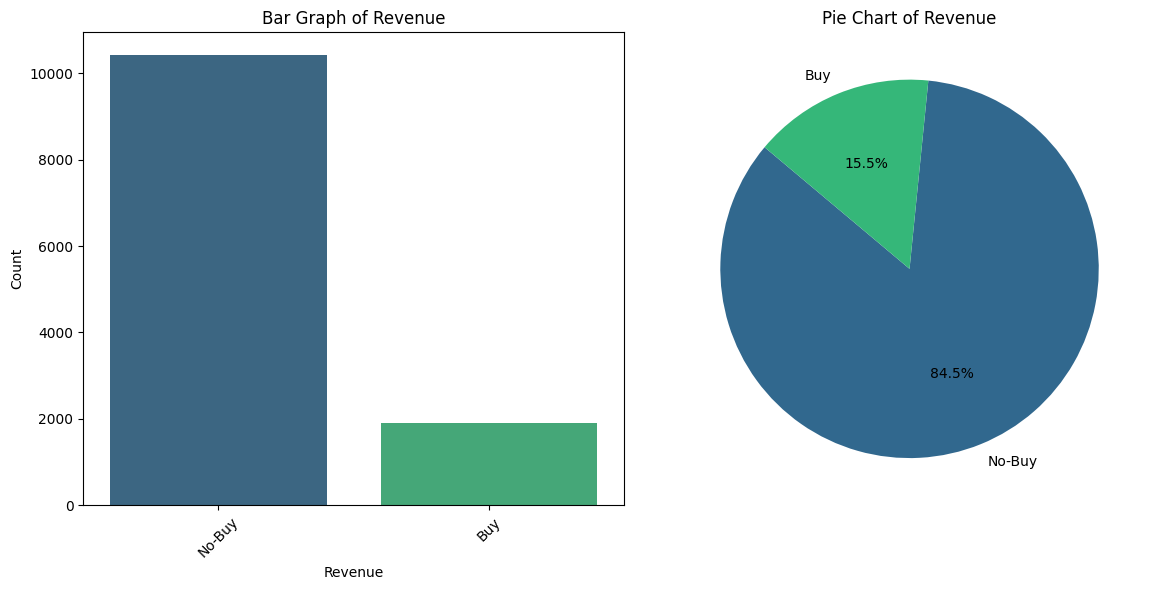

In [34]:
categorical_analysis(data)

### Observation

The data set is unbalanced as it consists of only 15.5% of the Buy class and the remainder for the No-Buy class

## Bivariate analysis

### Numerical vs numerical features (Correlation & scatter plots)

#### Scatter plots

In [38]:
# Scatter Plots with Trend Line
def scatter_plots_with_trendline(data, pairs):
    for x_var, y_var in pairs:
        plt.figure(figsize=(10, 6))
        sns.regplot(x=data[x_var], y=data[y_var], scatter_kws={'alpha':0.6}, line_kws={'color':'red'}, ci=None)
        plt.title(f'Scatter Plot of {x_var} vs {y_var} with Trend Line')
        plt.xlabel(x_var)
        plt.ylabel(y_var)
        plt.show()


In [39]:
# Define pairs of variables for scatter plots
pairs = [
    ('Administrative', 'Administrative_Duration'),
    ('Informational', 'Informational_Duration'),
    ('ProductRelated', 'ProductRelated_Duration'),
    ('BounceRates', 'ExitRates'),
    ('PageValues', 'SpecialDay')
]

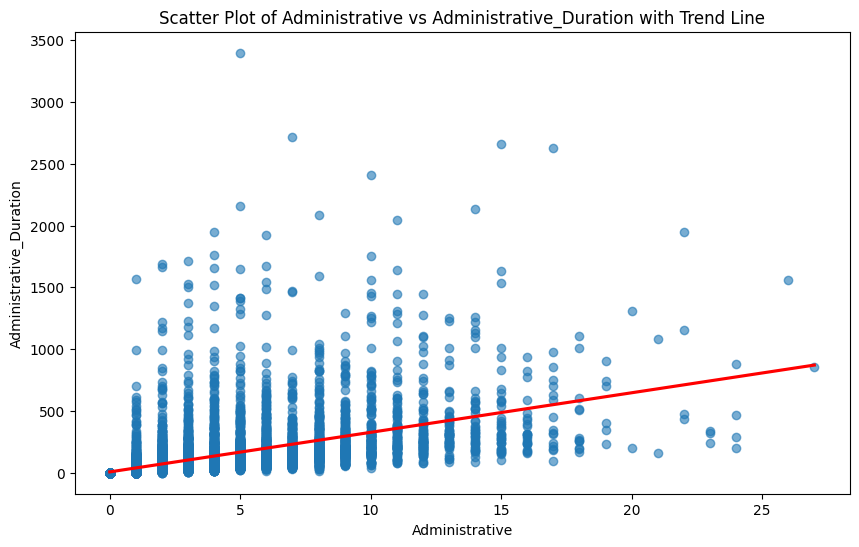

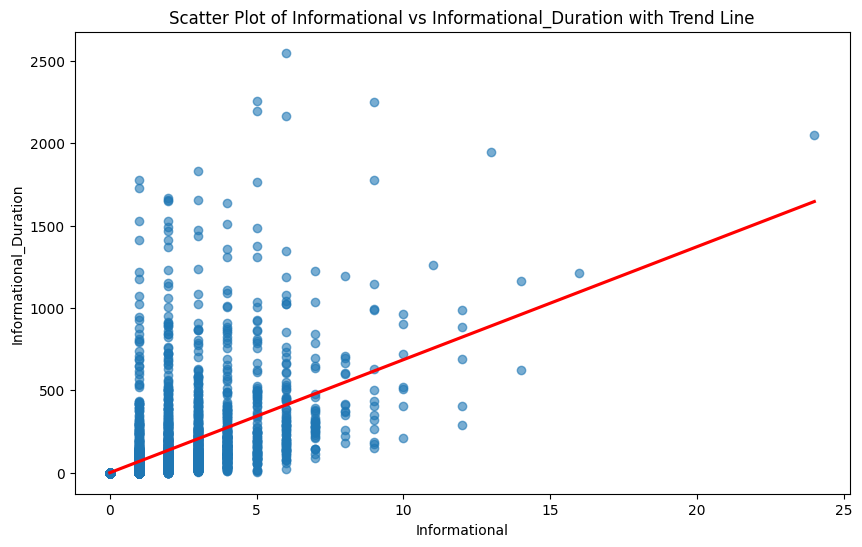

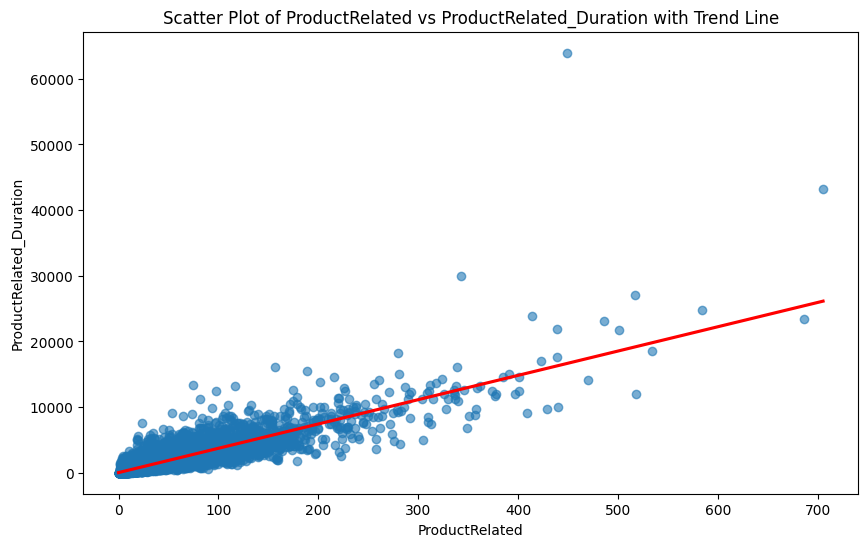

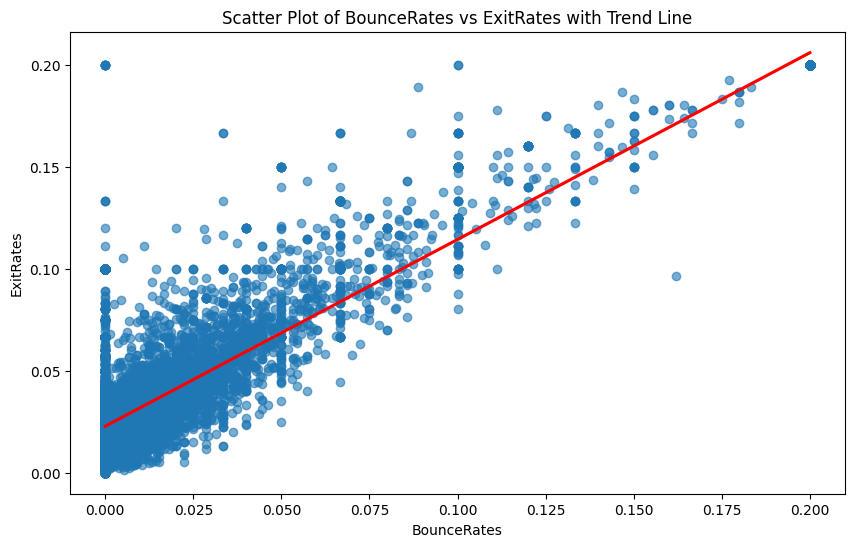

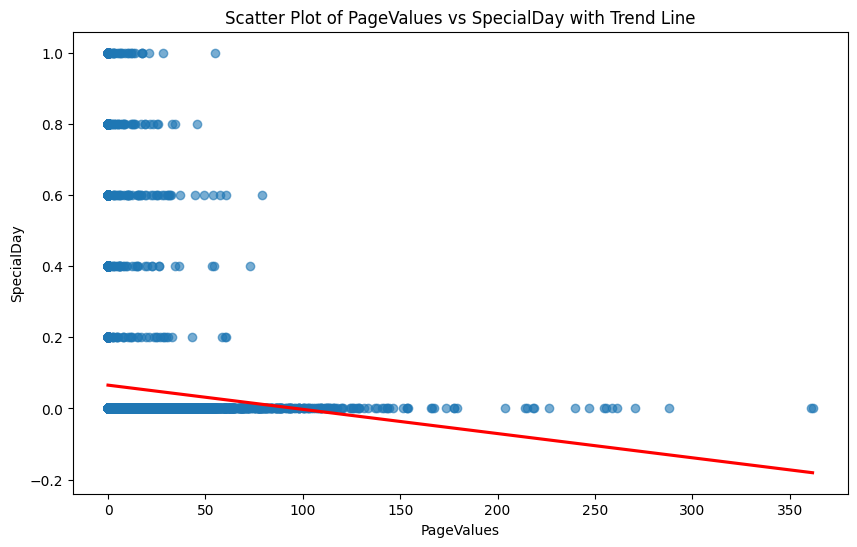

In [40]:
scatter_plots_with_trendline(data, pairs)

#### Correlation Matrix

In [42]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
print(corr_matrix)

                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561         

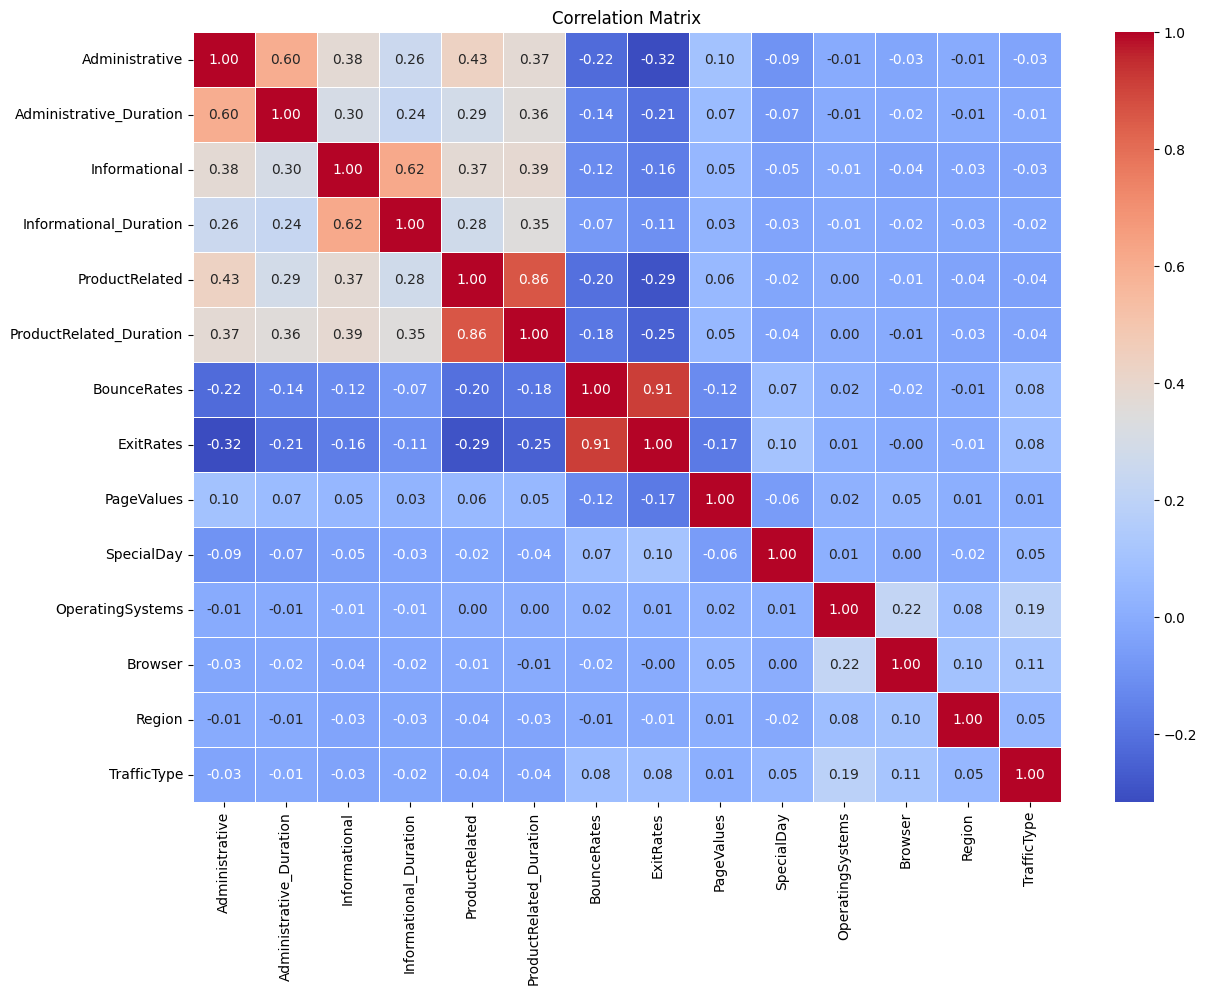

In [43]:
# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

 # Prepare the data
 - Encoding Categorical Variables
 - Feature Scaling
 - *Remove Outliers*

In [4]:
data['Revenue'] = data['Revenue'].astype(int)

In [5]:
revenue_column = data['Revenue']
data = data.drop(columns=['Revenue'])

In [6]:
data = pd.get_dummies(data).astype(int)

data['Revenue'] = revenue_column

In [7]:
scaler = StandardScaler()
data[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']] = scaler.fit_transform(data[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']])

In [8]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
0,0,-0.456512,0,-0.244704,1,-0.624166,0.0,0.0,-0.313368,0,...,0,0,0,0,0,0,0,0,1,0
1,0,-0.456512,0,-0.244704,2,-0.590720,0.0,0.0,-0.313368,0,...,0,0,0,0,0,0,0,0,1,0
2,0,-0.456512,0,-0.244704,1,-0.624166,0.0,0.0,-0.313368,0,...,0,0,0,0,0,0,0,0,1,0
3,0,-0.456512,0,-0.244704,2,-0.623121,0.0,0.0,-0.313368,0,...,0,0,0,0,0,0,0,0,1,0
4,0,-0.456512,0,-0.244704,10,-0.296501,0.0,0.0,-0.313368,0,...,0,0,0,0,0,0,0,0,1,0


## Split the data into training and test sets

In [8]:
X = data.drop('Revenue', axis=1)
y = data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building Predictive Models

## Logistic Regression

c:\Users\User\Documents\Portfolio Projects\Python Projects\online_shoppers_purchasing_intention_prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2055
           1       0.74      0.35      0.47       411

    accuracy                           0.87      2466
   macro avg       0.81      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466

Accuracy: 0.8710462287104623


<Figure size 800x600 with 0 Axes>

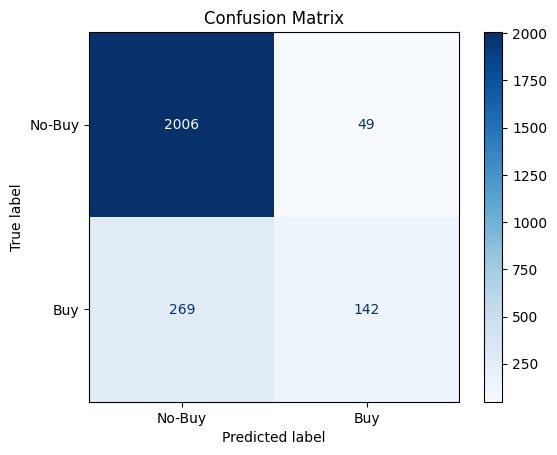

In [73]:
model_logit = LogisticRegression()
model_logit.fit(X_train, y_train)

y_pred_logit = model_logit.predict(X_test)
print(classification_report(y_test, y_pred_logit))
print('Accuracy:', accuracy_score(y_test, y_pred_logit))

cm = confusion_matrix(y_test, y_pred_logit)

# Plot confusion matrix using ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No-Buy', 'Buy'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


## Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2055
           1       0.57      0.56      0.56       411

    accuracy                           0.86      2466
   macro avg       0.74      0.74      0.74      2466
weighted avg       0.86      0.86      0.86      2466

Accuracy: 0.856853203568532


<Figure size 800x600 with 0 Axes>

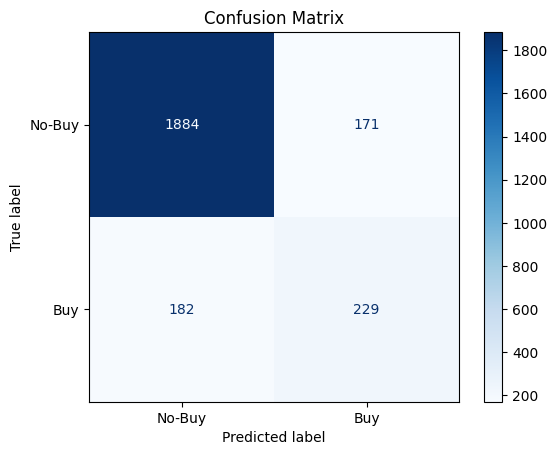

In [74]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print('Accuracy:', accuracy_score(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix using ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['No-Buy', 'Buy'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Classifier

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2055
           1       0.71      0.55      0.62       411

    accuracy                           0.89      2466
   macro avg       0.81      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466

Accuracy: 0.8876723438767234


<Figure size 800x600 with 0 Axes>

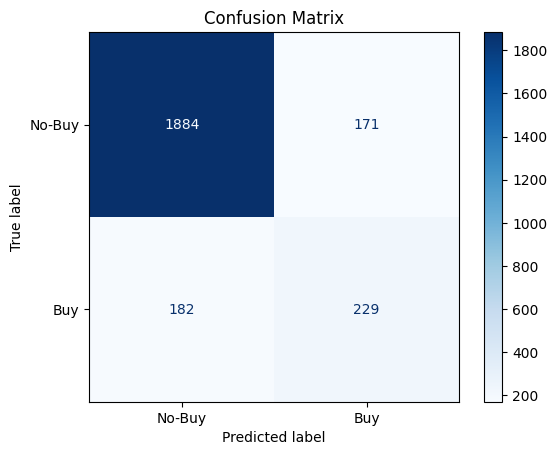

In [75]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix using ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No-Buy', 'Buy'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

## Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2055
           1       0.71      0.55      0.62       411

    accuracy                           0.89      2466
   macro avg       0.81      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466

Accuracy: 0.8876723438767234


<Figure size 800x600 with 0 Axes>

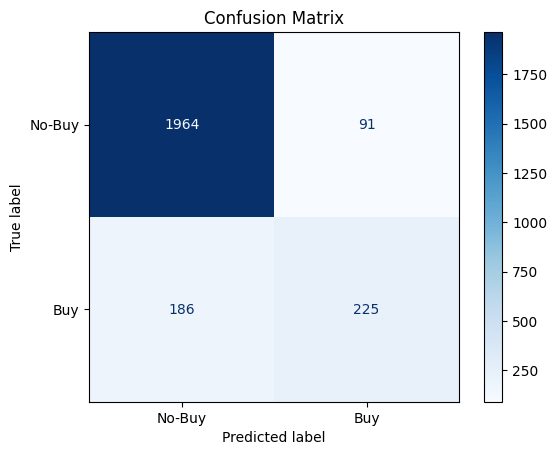

In [77]:
model_gd = GradientBoostingClassifier()
model_gd.fit(X_train, y_train)

y_pred_gd = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_gd))
print('Accuracy:', accuracy_score(y_test, y_pred_gd))

cm_gd = confusion_matrix(y_test, y_pred_gd)

# Plot confusion matrix using ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gd, display_labels=['No-Buy', 'Buy'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Model Evaluation and Improvement

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.8857463176822191

Tuning Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 20}
Best cross-validation accuracy for Decision Tree: 0.88686203915126

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.9012573905945273

Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Best cross-validation accuracy for Gradient Boosting: 0.9018657042487372


Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2055
           1       0.74      0.35      0.47       411

    accuracy                           0.87   

<Figure size 800x600 with 0 Axes>

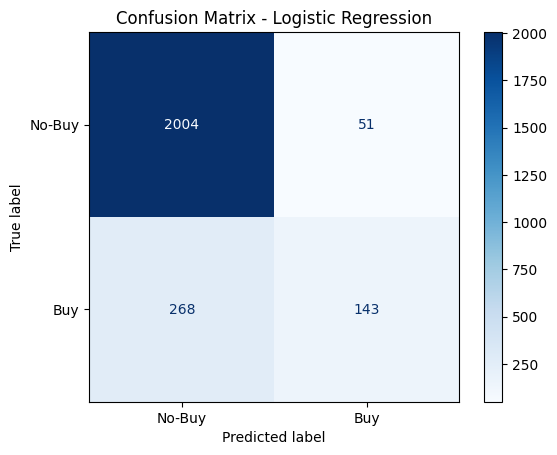


Decision Tree - Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2055
           1       0.67      0.53      0.59       411

    accuracy                           0.88      2466
   macro avg       0.79      0.74      0.76      2466
weighted avg       0.87      0.88      0.87      2466

Accuracy: 0.8787510137875101


<Figure size 800x600 with 0 Axes>

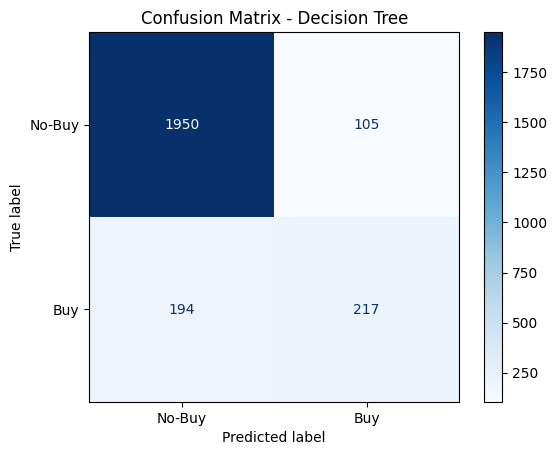


Random Forest - Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.72      0.55      0.62       411

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466

Accuracy: 0.889294403892944


<Figure size 800x600 with 0 Axes>

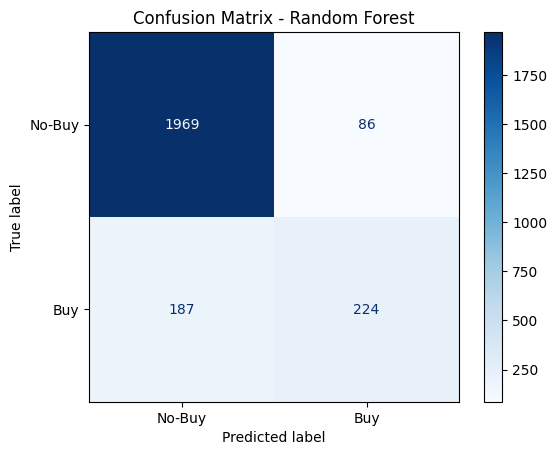


Gradient Boosting - Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2055
           1       0.71      0.59      0.64       411

    accuracy                           0.89      2466
   macro avg       0.81      0.77      0.79      2466
weighted avg       0.89      0.89      0.89      2466

Accuracy: 0.8909164639091647


<Figure size 800x600 with 0 Axes>

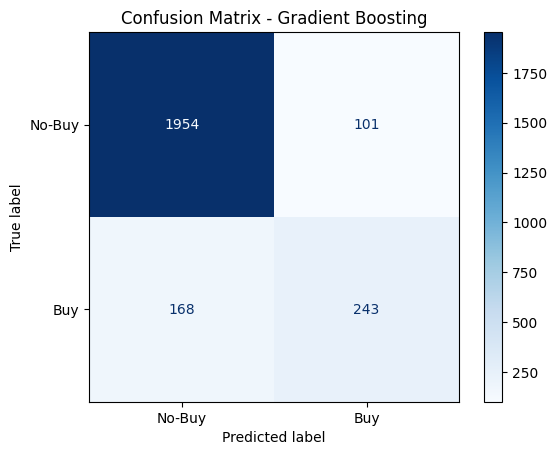

In [9]:
# Define models and hyperparameter grids
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Hyperparameter tuning with GridSearchCV
best_models = {}
for model_name in models:
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_}\n")

# Evaluate the best models
for model_name in best_models:
    model = best_models[model_name]
    y_pred = model.predict(X_test)
    print(f"\n{model_name} - Classification Report:\n")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No-Buy', 'Buy'])
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


## SMOTE (Synthetic Minority Over-sampling Technique) with TomekLink

In [14]:
smote = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority') ,random_state=42)

X_res, y_res = smote.fit_resample(X, y)

In [15]:
y_res.value_counts()

Revenue
1    10422
0    10373
Name: count, dtype: int64

# Split the data into training and test sets

In [16]:
X_train, X_test,y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res)

## Reuilding Predictive Models

### Logistic Regression

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2075
           1       0.94      0.85      0.89      2084

    accuracy                           0.90      4159
   macro avg       0.90      0.90      0.90      4159
weighted avg       0.90      0.90      0.90      4159

Accuracy: 0.8985333012743448


<Figure size 800x600 with 0 Axes>

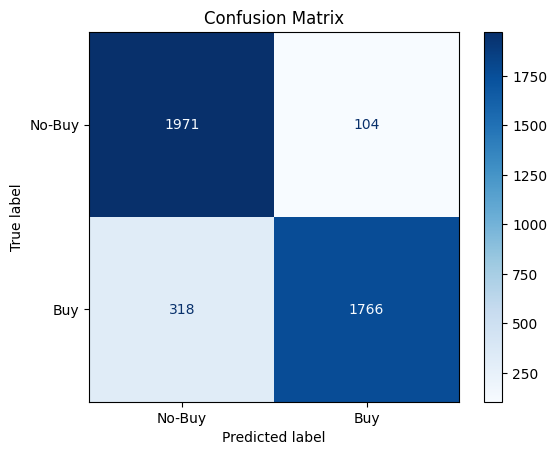

In [18]:
model_logit = LogisticRegression(random_state=42, max_iter=10000)
model_logit.fit(X_train, y_train)

y_pred_logit = model_logit.predict(X_test)
print(classification_report(y_test, y_pred_logit))
print('Accuracy:', accuracy_score(y_test, y_pred_logit))

cm = confusion_matrix(y_test, y_pred_logit)

# Plot confusion matrix using ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No-Buy', 'Buy'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

### ## Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2075
           1       0.91      0.91      0.91      2084

    accuracy                           0.91      4159
   macro avg       0.91      0.91      0.91      4159
weighted avg       0.91      0.91      0.91      4159

Accuracy: 0.9095936523202693


<Figure size 800x600 with 0 Axes>

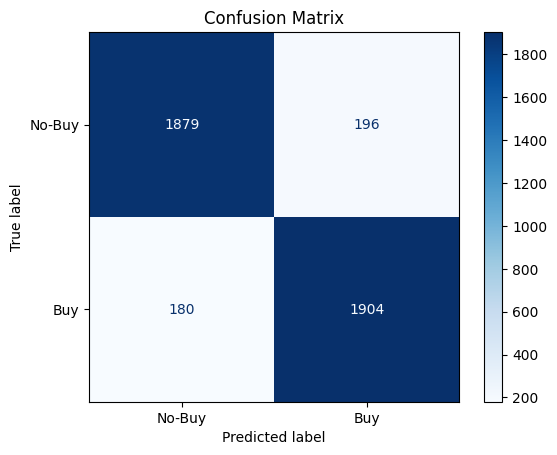

In [19]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print('Accuracy:', accuracy_score(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix using ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['No-Buy', 'Buy'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2075
           1       0.93      0.94      0.94      2084

    accuracy                           0.94      4159
   macro avg       0.94      0.94      0.94      4159
weighted avg       0.94      0.94      0.94      4159

Accuracy: 0.9358018754508295


<Figure size 800x600 with 0 Axes>

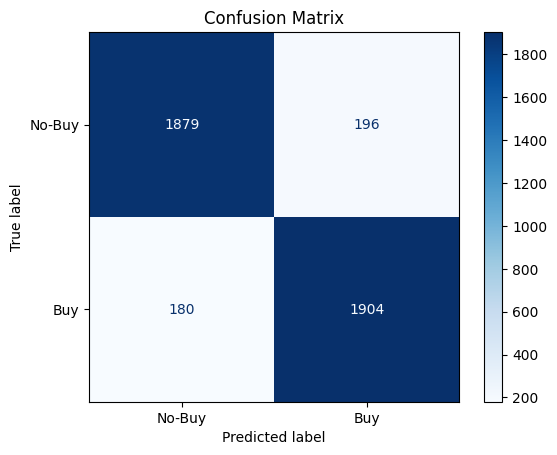

In [20]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix using ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No-Buy', 'Buy'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

### Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2075
           1       0.93      0.94      0.94      2084

    accuracy                           0.94      4159
   macro avg       0.94      0.94      0.94      4159
weighted avg       0.94      0.94      0.94      4159

Accuracy: 0.9358018754508295


<Figure size 800x600 with 0 Axes>

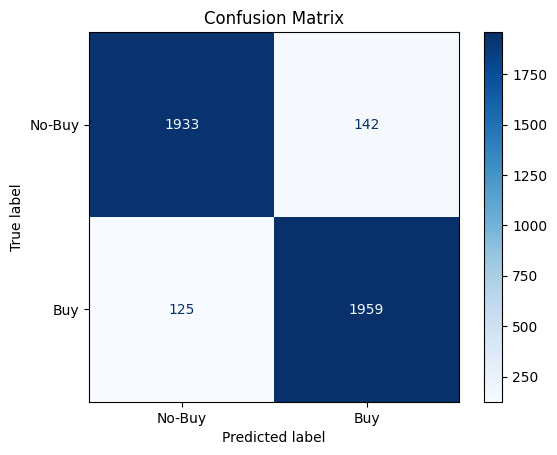

In [21]:
model_gd = GradientBoostingClassifier()
model_gd.fit(X_train, y_train)

y_pred_gd = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_gd))
print('Accuracy:', accuracy_score(y_test, y_pred_gd))

cm_gd = confusion_matrix(y_test, y_pred_gd)

# Plot confusion matrix using ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gd, display_labels=['No-Buy', 'Buy'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()